In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
import numpy as np

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [4]:
# Format dates as ISO format
start1 = pd.Timestamp("2018-12-10", tz="America/New_York").isoformat()
end1 = pd.Timestamp("2020-01-20", tz="America/New_York").isoformat()
start2 = pd.Timestamp("2020-01-21", tz="America/New_York").isoformat()
today = pd.Timestamp("2021-09-20", tz="America/New_York").isoformat()

In [5]:
# Set the tickers
tickers = ["MRNA", "PFE","INO","SNY","AZN","MRK","NVAX","GSK","JNJ","MDGS"]
#ticker_index = ["XBI"]

In [6]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [7]:
# Get closing prices 
df_portfolio_all = alpaca.get_barset(
    tickers,
    timeframe,
    start = start1,
    end = today,
    limit = 1000
).df


# Display sample data
df_portfolio_all.head(10)


AZN                                     GSK  \
                            open   high      low   close   volume   open   
time                                                                       
2018-12-10 00:00:00-05:00  38.86  38.86  38.1300  38.420  6655389  37.41   
2018-12-11 00:00:00-05:00  39.14  39.31  38.4450  38.660  6024419  38.06   
2018-12-12 00:00:00-05:00  38.91  39.31  38.8900  38.920  3967506  37.76   
2018-12-13 00:00:00-05:00  39.26  39.50  39.0300  39.230  1989476  38.03   
2018-12-14 00:00:00-05:00  39.20  39.21  38.9100  39.160  4203526  37.58   
2018-12-17 00:00:00-05:00  39.20  39.28  38.1650  38.355  4128165  37.45   
2018-12-18 00:00:00-05:00  38.47  38.59  38.0715  38.235  2757740  37.37   
2018-12-19 00:00:00-05:00  38.48  38.53  37.6500  37.960  4067604  39.26   
2018-12-20 00:00:00-05:00  38.91  38.91  37.8600  38.040  4366744  38.30   
2018-12-21 00:00:00-05:00  37.70  38.21  37.4900  37.520  3294398  37.83   

                                                            ...    PFE  \
                             high    low   close    volume  ...   open   
time                                                        ...          
2018-12-10 00:00:00-05:00  37.800  37.16  37.685   4373858  ...  44.14   
2018-12-11 00:00:00-05:00  38.110  37.24  37.360   3447608  ...  44.08   
2018-12-12 00:00:00-05:00  38.160  37.66  37.670   2360025  ...  44.35   
2018-12-13 00:00:00-05:00  38.100  37.67  37.940   2198395  ...  44.46   
2018-12-14 00:00:00-05:00  37.675  37.40  37.615   4120670  ...  44.08   
2018-12-17 00:00:00-05:00  37.515  36.94  37.070   3806938  ...  43.50   
2018-12-18 00:00:00-05:00  37.400  36.87  37.090   4200825  ...  43.47   
2018-12-19 00:00:00-05:00  39.270  37.30  37.410  13709288  ...  42.83   
2018-12-20 00:00:00-05:00  38.620  37.68  37.910   6190728  ...  41.71   
2018-12-21 00:00:00-05:00  38.360  37.57  37.590   4310006  ...  41.64   

                                                               SNY         \
                             high     low   close    volume   open   high   
time                                                                        
2018-12-10 00:00:00-05:00  44.560  43.070  44.405  22466277  44.15  44.38   
2018-12-11 00:00:00-05:00  44.510  43.570  44.020  20020936  44.71  44.72   
2018-12-12 00:00:00-05:00  44.845  44.150  44.170  14819586  45.28  45.56   
2018-12-13 00:00:00-05:00  44.900  44.210  44.550  16251482  44.51  44.89   
2018-12-14 00:00:00-05:00  44.120  43.425  43.845  24085732  44.03  44.27   
2018-12-17 00:00:00-05:00  43.970  42.980  43.100  30524854  43.93  44.05   
2018-12-18 00:00:00-05:00  43.500  42.040  42.400  24825645  43.48  43.51   
2018-12-19 00:00:00-05:00  42.990  41.560  41.970  30307929  43.82  44.05   
2018-12-20 00:00:00-05:00  42.410  41.530  41.960  26909733  43.68  43.74   
2018-12-21 00:00:00-05:00  42.870  41.450  41.950  34505684  42.71  43.15   

                                                    
                               low  close   volume  
time                                                
2018-12-10 00:00:00-05:00  43.5100  44.17  1172644  
2018-12-11 00:00:00-05:00  44.1036  44.34  1295092  
2018-12-12 00:00:00-05:00  45.1400  45.14  1330747  
2018-12-13 00:00:00-05:00  44.3371  44.84  1164531  
2018-12-14 00:00:00-05:00  44.0000  44.07   992662  
2018-12-17 00:00:00-05:00  43.4400  43.58  1165226  
2018-12-18 00:00:00-05:00  43.0800  43.23   901134  
2018-12-19 00:00:00-05:00  43.0900  43.36   878669  
2018-12-20 00:00:00-05:00  43.1400  43.22  1108288  
2018-12-21 00:00:00-05:00  42.4050  42.42  1292248  

[10 rows x 50 columns]

In [8]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices 
#"CVAC","MRNA", "PFE","INO","SNY","AZN","MRK","NVAX","GSK","JNJ","MDGS"
df_closing_prices["MRNA"] = df_portfolio_all["MRNA"]["close"]
df_closing_prices["PFE"] = df_portfolio_all["PFE"]["close"]
df_closing_prices["INO"] = df_portfolio_all["INO"]["close"]
df_closing_prices["SNY"] = df_portfolio_all["SNY"]["close"]
df_closing_prices["AZN"] = df_portfolio_all["AZN"]["close"]
df_closing_prices["MRK"] = df_portfolio_all["MRK"]["close"]
df_closing_prices["NVAX"] = df_portfolio_all["NVAX"]["close"]
df_closing_prices["GSK"] = df_portfolio_all["GSK"]["close"]
df_closing_prices["JNJ"] = df_portfolio_all["JNJ"]["close"]
df_closing_prices["MDGS"] = df_portfolio_all["MDGS"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

MRNA     PFE   INO    SNY     AZN    MRK   NVAX     GSK  \
2018-12-10  18.7577  44.405  5.20  44.17  38.420  77.42  2.130  37.685   
2018-12-11  18.0100  44.020  5.18  44.34  38.660  77.13  2.230  37.360   
2018-12-12  18.7500  44.170  5.30  45.14  38.920  78.02  2.470  37.670   
2018-12-13  18.7600  44.550  5.11  44.84  39.230  79.00  2.290  37.940   
2018-12-14  18.3100  43.845  4.87  44.07  39.160  76.50  2.420  37.615   
2018-12-17  17.0000  43.100  4.73  43.58  38.355  75.22  2.280  37.070   
2018-12-18  16.9000  42.400  4.53  43.23  38.235  74.33  2.165  37.090   
2018-12-19  16.0250  41.970  4.45  43.36  37.960  73.75  2.160  37.410   
2018-12-20  15.5030  41.960  4.25  43.22  38.040  73.48  2.050  37.910   
2018-12-21  14.4350  41.950  3.89  42.42  37.520  72.87  1.910  37.590   

               JNJ    MDGS  
2018-12-10  145.29  3.3252  
2018-12-11  146.53  3.3400  
2018-12-12  147.20  3.4200  
2018-12-13  147.79  3.4700  
2018-12-14  132.86  3.2600  
2018-12-17  129.11  3.2500  
2018-12-18  130.41  3.1400  
2018-12-19  127.63  3.0400  
2018-12-20  128.22  3.0400  
2018-12-21  128.08  2.8600

In [9]:
df_closing_prices.index.name = 'Date'

In [10]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()
# due to stock split for NVAX on May 10 2019, we have to remove the data on that date so that there's no outliners.
df_daily_returns = df_daily_returns.drop(pd.to_datetime('2019-05-10'))
# Display sample data
df_daily_returns.head()

MRNA       PFE       INO       SNY       AZN       MRK  \
Date                                                                     
2018-12-11 -0.039861 -0.008670 -0.003846  0.003849  0.006247 -0.003746   
2018-12-12  0.041088  0.003408  0.023166  0.018042  0.006725  0.011539   
2018-12-13  0.000533  0.008603 -0.035849 -0.006646  0.007965  0.012561   
2018-12-14 -0.023987 -0.015825 -0.046967 -0.017172 -0.001784 -0.031646   
2018-12-17 -0.071546 -0.016992 -0.028747 -0.011119 -0.020557 -0.016732   

                NVAX       GSK       JNJ      MDGS  
Date                                                
2018-12-11  0.046948 -0.008624  0.008535  0.004451  
2018-12-12  0.107623  0.008298  0.004572  0.023952  
2018-12-13 -0.072874  0.007168  0.004008  0.014620  
2018-12-14  0.056769 -0.008566 -0.101022 -0.060519  
2018-12-17 -0.057851 -0.014489 -0.028225 -0.003067

In [11]:
import hvplot.pandas

In [12]:
# Use hvplot() function to plot data
df_daily_returns.hvplot.line(xlabel="Year", ylabel="Daily Return")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [71]:
# building index - way 1: eaqual weighting
df_closing_prices["sum"] = df_closing_prices.sum(axis=1)

In [72]:
df_index_eq_weight = pd.DataFrame()
df_index_eq_weight["price"] = df_closing_prices['sum']/10
df_closing_prices = df_closing_prices.drop(columns=['sum'])

In [73]:
df_index_eq_weight.hvplot.line(label = "index_price by equal weighting", height=400) * df_closing_prices.hvplot.line()

:Overlay
   .Curve.Index_price_by_equal_weighting :Curve   [Date]   (price)
   .NdOverlay.I                          :NdOverlay   [Variable]
      :Curve   [Date]   (value)

In [74]:
# building index - way 2: by market caps
company_info_path = Path("company_info.txt")
company_info = pd.read_csv(
    company_info_path, index_col="Short_code", parse_dates=True, infer_datetime_format=True
)

<AxesSubplot:title={'center':'companies by Vaccine types'}, ylabel='type'>

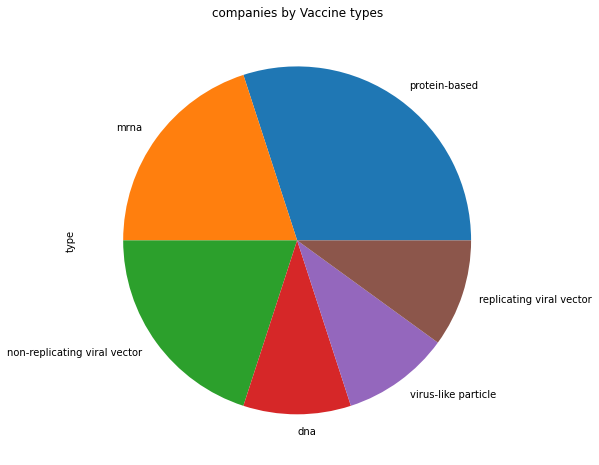

In [75]:
# pie chart by vaccines type
vac_type = pd.DataFrame()
vac_type['type']= company_info['vaccine_type']
vac_type_count = vac_type['type'].value_counts()
vac_type_count.plot(kind='pie',figsize=(8, 8),title='companies by Vaccine types')

In [98]:
# get the weighting by market caps in a new dataframe
df_weighting_by_mktcaps = pd.DataFrame()
toal_mktcaps = company_info.sum()[1]
df_weighting_by_mktcaps['weighting'] =  company_info['market_caps']/toal_mktcaps
df_weighting_by_mktcaps = df_weighting_by_mktcaps.sort_values("weighting",ascending=True)

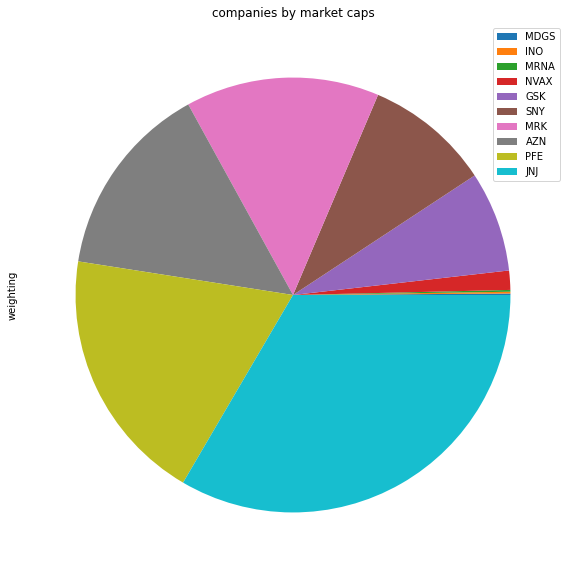

In [112]:
import matplotlib.pyplot as plt

fig = df_weighting_by_mktcaps.plot.pie(y='weighting',figsize=(10, 10),title='companies by market caps', labels=None).get_figure()
fig.savefig('index_by_market_caps.png')

In [100]:
# sort the companies by market cap
df_weighting_by_mktcaps.sort_values('weighting',inplace=True)
df_weighting_by_mktcaps

weighting
Short_code           
MDGS         0.001090
INO          0.001306
MRNA         0.001337
NVAX         0.014280
GSK          0.074631
SNY          0.093393
MRK          0.143984
AZN          0.145267
PFE          0.190372
JNJ          0.334340

In [101]:
# PFE,JNJ,MRK,AZN,GSK,SNY will be assigned weighting eaqual to 15%
large_caps = df_weighting_by_mktcaps.iloc[0:6].copy()
large_caps.loc[:,'weighting'] = 0.15
large_caps

weighting
Short_code           
MDGS             0.15
INO              0.15
MRNA             0.15
NVAX             0.15
GSK              0.15
SNY              0.15

In [102]:
# Set the rest of the portions will be allocated to the rest by market caps
small_caps_weighting = pd.DataFrame()
small_caps = df_weighting_by_mktcaps.iloc[:-6]
small_caps_total = small_caps['weighting'].sum()
small_caps_weighting ['weighting'] = (small_caps['weighting']/small_caps_total)*0.1

small_caps_weighting

weighting
Short_code           
MDGS         0.006049
INO          0.007250
MRNA         0.007422
NVAX         0.079279

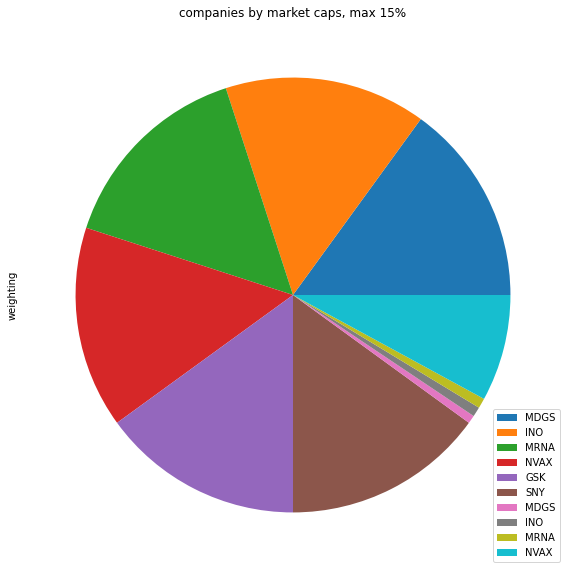

In [115]:
weighting_with_cap = pd.concat([large_caps, small_caps_weighting])
fig = weighting_with_cap.plot(kind='pie',y='weighting',figsize=(10, 10),title='companies by market caps, max 15%',  labels=None).get_figure()
fig.savefig('index_by_market_caps_max15.png')

In [123]:
# Set the dataframe based on the market cap with max weight 15%
df_index_2 = pd.DataFrame()
df_index_2['index_price'] = (small_caps_weighting.iloc[0]['weighting'] * df_closing_prices['MDGS']
+ small_caps_weighting.iloc[1]['weighting'] * df_closing_prices['INO']
+ small_caps_weighting.iloc[2]['weighting'] * df_closing_prices['MRNA']
+ small_caps_weighting.iloc[3]['weighting'] * df_closing_prices['NVAX']
+ 0.15 * df_closing_prices['GSK']
+ 0.15 * df_closing_prices['SNY']
+ 0.15 * df_closing_prices['PFE']
+ 0.15 * df_closing_prices['JNJ']
+ 0.15 * df_closing_prices['MRK']
+ 0.15 * df_closing_prices['AZN'])
# normalize the index price to $100 initially
df_index_2['index_price'] = 100*df_index_2['index_price']/df_index_2['index_price'][0]
df_index_2.head()

index_price
Date                   
2018-12-10   100.000000
2018-12-11   100.170713
2018-12-12   101.005049
2018-12-13   101.550978
2018-12-14    96.606859

In [132]:
# Normalize returns for the individual stocks
df_closing_prices_normalized = 100*df_closing_prices/df_closing_prices.iloc[0]
df_closing_prices_normalized.head()

MRNA         PFE         INO         SNY         AZN  \
Date                                                                     
2018-12-10  100.000000  100.000000  100.000000  100.000000  100.000000   
2018-12-11   96.013904   99.132981   99.615385  100.384877  100.624675   
2018-12-12   99.958950   99.470780  101.923077  102.196061  101.301406   
2018-12-13  100.012262  100.326540   98.269231  101.516867  102.108277   
2018-12-14   97.613247   98.738881   93.653846   99.773602  101.926080   

                   MRK        NVAX         GSK         JNJ        MDGS  
Date                                                                    
2018-12-10  100.000000  100.000000  100.000000  100.000000  100.000000  
2018-12-11   99.625420  104.694836   99.137588  100.853465  100.445086  
2018-12-12  100.774994  115.962441   99.960196  101.314612  102.850956  
2018-12-13  102.040816  107.511737  100.676662  101.720697  104.354625  
2018-12-14   98.811677  113.615023   99.814250   91.444697   98.039216

In [135]:
df_closing_prices_normalized.tail()

MRNA         PFE         INO         SNY         AZN  \
Date                                                                      
2021-09-14  2279.117376  100.709380  145.000000  109.259679  145.627277   
2021-09-15  2316.168827  100.844499  145.576923  108.671044  146.954711   
2021-09-16  2350.394771  100.123860  149.038462  109.146480  147.345133   
2021-09-17  2292.765104   98.817701  156.153846  109.418157  144.612181   
2021-09-20  2255.927432   99.538565  150.000000  108.467285  152.290474   

                  MRK          NVAX         GSK         JNJ       MDGS  
Date                                                                    
2021-09-14  93.154224  10995.305164  104.471275  113.448964  41.801997  
2021-09-15  94.045466  10895.399061  104.046703  113.861931  41.801997  
2021-09-16  92.934513  11133.802817  103.754810  113.703627  43.606400  
2021-09-17  92.547145  11152.112676  103.303702  113.380136  44.508601  
2021-09-20  92.895893  10656.338028  103.064880  112.733154  47.816673

In [160]:
# Plot returns of our index comparing to the individual stocks
df_index_2.hvplot.line(label = "index_price by market caps" ,  height=500, ylabel='normalized price') * df_closing_prices_normalized.hvplot.line()

:Overlay
   .Curve.Index_price_by_market_caps :Curve   [Date]   (index_price)
   .NdOverlay.I                      :NdOverlay   [Variable]
      :Curve   [Date]   (value)

In [136]:
df_index_2.hvplot.line(label = "index_price by market caps" )

:Curve   [Date]   (index_price)

In [144]:
df_index_1 = df_index_eq_weight
# normalize the index price to $100 initially
df_index_1.rename(columns={"price": "index_price"}, inplace=True)
df_index_1['index_price'] = 100*df_index_1['index_price']/df_index_1['index_price'][0]
df_index_1.head()

In [145]:
# plot the performance of this mix
df_index_1.hvplot.line(label = "index_price by equally weighting" )

:Curve   [Date]   (index_price)

In [146]:
# NBI index
nbi_path = Path("NBI.csv")
nbi_file = pd.read_csv(
    nbi_path, index_col="Date", parse_dates=True, infer_datetime_format=True
)

In [147]:
nbi = pd.DataFrame()
nbi['nbi_price'] = nbi_file['Close']

In [148]:
nbi.hvplot.line(label = "NBI" )

:Curve   [Date]   (nbi_price)

In [149]:
# convert to daily returns so to make comparable
df_index_1_returns = df_index_1.pct_change().dropna()
df_index_2_returns = df_index_2.pct_change().dropna()
nbi_returns = nbi.pct_change().dropna()

In [150]:
nbi_returns.hvplot.line(label ='NBI') * df_index_1_returns.hvplot.line(label = "vaccine index by equal weights") * df_index_2_returns.hvplot.line(label = "vaccine index by mkt caps")

:Overlay
   .Curve.NBI                            :Curve   [Date]   (nbi_price)
   .Curve.Vaccine_index_by_equal_weights :Curve   [Date]   (index_price)
   .Curve.Vaccine_index_by_mkt_caps      :Curve   [Date]   (index_price)

In [151]:
# statistics Analysis
# from above graph, we can see the vols etc increased since Mar 2020. So we will split into two data setsto do the analysis
df_index_1_returns.index = pd.to_datetime(df_index_1_returns.index)
df_index_1_returns_covid=df_index_1_returns['2020-03-01':]
df_index_1_returns_beforecovid=df_index_1_returns[:'2020-03-01']

df_index_2_returns.index = pd.to_datetime(df_index_1_returns.index)
df_index_2_returns_covid=df_index_2_returns['2020-03-01':]
df_index_2_returns_beforecovid=df_index_2_returns[:'2020-03-01']

nbi_returns_covid=nbi_returns['2020-03-01':]
nbi_returns_beforecovid=nbi_returns[:'2020-03-01']

In [32]:
joined_returns_covid = pd.concat(
    [df_index_1_returns_covid, df_index_2_returns_covid, nbi_returns_covid], axis="columns", join="inner"
)
joined_returns_covid.columns = ['returns of index by equally weighting','returns of index by market caps','returns of NBI index']

joined_returns_beforecovid = pd.concat(
    [df_index_1_returns_beforecovid, df_index_2_returns_beforecovid, nbi_returns_beforecovid], axis="columns", join="inner"
)
joined_returns_beforecovid.columns = ['returns of index by equally weighting','returns of index by market caps','returns of NBI index']


In [33]:
joined_returns_covid.describe()

returns of index by equally weighting  returns of index by market caps  \
count                             392.000000                       392.000000   
mean                                0.002753                         0.001163   
std                                 0.025006                         0.017955   
min                                -0.064706                        -0.074191   
25%                                -0.013339                        -0.008255   
50%                                 0.003085                         0.000888   
75%                                 0.017080                         0.011191   
max                                 0.127098                         0.074826   

       returns of NBI index  
count            392.000000  
mean               0.001223  
std                0.019078  
min               -0.096598  
25%               -0.009265  
50%                0.001724  
75%                0.010943  
max                0.070580

In [34]:
joined_returns_beforecovid.describe()

returns of index by equally weighting  returns of index by market caps  \
count                             306.000000                     3.060000e+02   
mean                                0.000086                    -1.604716e-07   
std                                 0.009061                     8.959302e-03   
min                                -0.047449                    -4.868608e-02   
25%                                -0.004562                    -3.931930e-03   
50%                                 0.000386                     4.434303e-04   
75%                                 0.005666                     5.325922e-03   
max                                 0.027506                     3.178127e-02   

       returns of NBI index  
count            306.000000  
mean               0.000392  
std                0.013478  
min               -0.041255  
25%               -0.007678  
50%                0.000949  
75%                0.007990  
max                0.061664

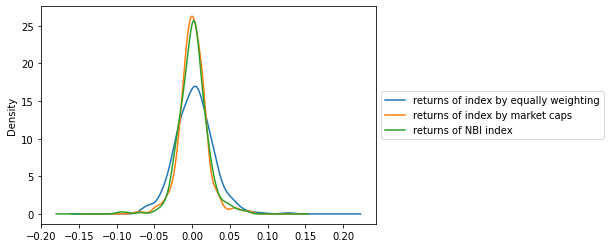

In [156]:
joined_returns_covid.plot.density().legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

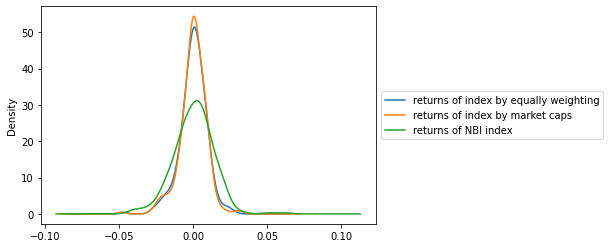

In [157]:
joined_returns_beforecovid.plot.density().legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [37]:
# excess returns
excess_returns_beforecovid = joined_returns_beforecovid.mean()
excess_returns_beforecovid

returns of index by equally weighting    8.623482e-05
returns of index by market caps         -1.604716e-07
returns of NBI index                     3.915309e-04
dtype: float64

In [38]:
excess_returns_covid = joined_returns_covid.mean()
excess_returns_covid

returns of index by equally weighting    0.002753
returns of index by market caps          0.001163
returns of NBI index                     0.001223
dtype: float64

In [39]:
#  Sharpe Ratio
sharpe_ratios_beforecovid = (joined_returns_beforecovid.mean() * 252) / (joined_returns_beforecovid.std() * np.sqrt(252))
sharpe_ratios_beforecovid

returns of index by equally weighting    0.151082
returns of index by market caps         -0.000284
returns of NBI index                     0.461148
dtype: float64

In [40]:
sharpe_ratios_covid = (joined_returns_covid.mean() * 252) / (joined_returns_covid.std() * np.sqrt(252))
sharpe_ratios_covid

returns of index by equally weighting    1.747922
returns of index by market caps          1.028417
returns of NBI index                     1.017953
dtype: float64

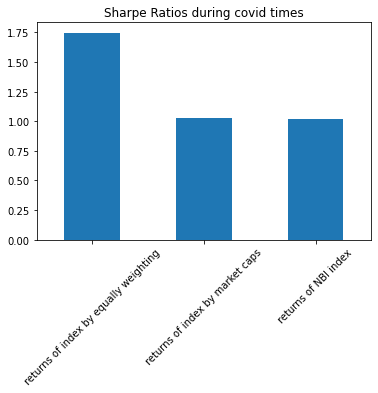

In [154]:
sharpe_ratios_covid.plot(kind="bar", title="Sharpe Ratios during covid times",rot=45).get_figure().savefig('sharpe_ratio_covid_times.png')

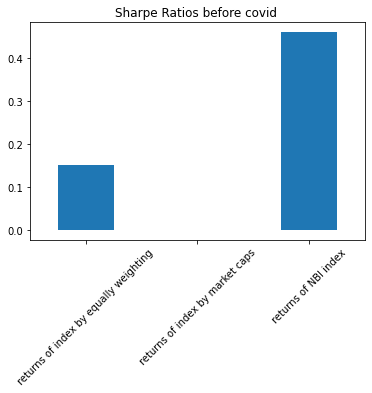

In [161]:
sharpe_ratios_beforecovid.plot(kind="bar", title="Sharpe Ratios before covid ",rot=45).get_figure().savefig('Sharpe_b4_covid.png')
# returns of index by market caps has near 0 sharpe ratio

In [43]:
#beta
variance_beforecovid_index1 = joined_returns_beforecovid['returns of index by equally weighting'].var()
variance_beforecovid_index2 = joined_returns_beforecovid['returns of index by market caps'].var()
variance_covid_index1 = joined_returns_covid['returns of index by equally weighting'].var()
variance_covid_index2 = joined_returns_covid['returns of index by market caps'].var()
# note covariance with NBI here. you can use sp500 or others later on if you want
covariance_beforecovid_index1 = joined_returns_beforecovid['returns of index by equally weighting'].cov(joined_returns_beforecovid['returns of NBI index'])
covariance_beforecovid_index2 = joined_returns_beforecovid['returns of index by market caps'].cov(joined_returns_beforecovid['returns of NBI index'])
covariance_covid_index1 = joined_returns_covid['returns of index by equally weighting'].cov(joined_returns_covid['returns of NBI index'])
covariance_covid_index2 = joined_returns_covid['returns of index by market caps'].cov(joined_returns_covid['returns of NBI index'])

In [44]:
#equally weighted index's deta: before covid 
beta_beforecovid_index1=covariance_beforecovid_index1 / variance_beforecovid_index1
beta_beforecovid_index1

0.8947498852002007

In [45]:
# index by market caps - beta: before covid
beta_beforecovid_index2=covariance_beforecovid_index2 / variance_beforecovid_index2
beta_beforecovid_index2

0.850118569396953

In [46]:
#  during covid
beta_covid_index1=covariance_covid_index1 / variance_covid_index1
beta_covid_index1

0.5232780551352286

In [47]:
beta_covid_index2=covariance_covid_index2 / variance_covid_index2
beta_covid_index2

0.7982069821353874

In [48]:
excess_returns_beforecovid

returns of index by equally weighting    8.623482e-05
returns of index by market caps         -1.604716e-07
returns of NBI index                     3.915309e-04
dtype: float64

In [49]:
#alpha: Alpha = R – Rf – beta (Rm-Rf); which assume Rf=0 here. This is to measure passive returns
Alpha_beforecovid_index1 = excess_returns_beforecovid['returns of index by equally weighting'] - beta_beforecovid_index1*joined_returns_beforecovid['returns of NBI index'].mean()
Alpha_beforecovid_index1

-0.00026408743908597654

In [50]:
Alpha_beforecovid_index2 = excess_returns_beforecovid['returns of index by market caps'] - beta_beforecovid_index2*joined_returns_beforecovid['returns of NBI index'].mean()
Alpha_beforecovid_index2

-0.0003330081938654281

In [51]:
Alpha_covid_index1 = excess_returns_beforecovid['returns of index by equally weighting'] - beta_covid_index1*joined_returns_covid['returns of NBI index'].mean()
Alpha_covid_index1

-0.0005539479583246913

In [52]:
Alpha_covid_index2 = excess_returns_covid['returns of index by market caps'] - beta_covid_index2*joined_returns_covid['returns of NBI index'].mean()
Alpha_covid_index2

0.00018664444862236866

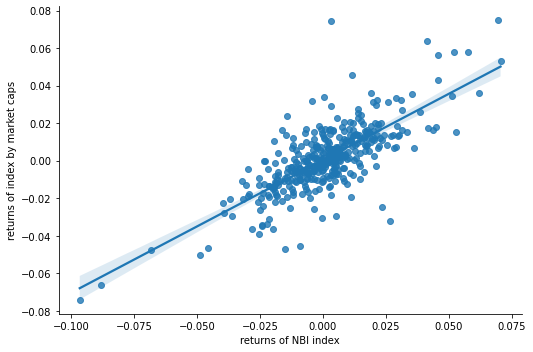

In [53]:
# correlation between our index with NBI
import seaborn as sns
#covid times

sns.lmplot(x="returns of NBI index", y="returns of index by market caps", data=joined_returns_covid, aspect=1.5, fit_reg=True)

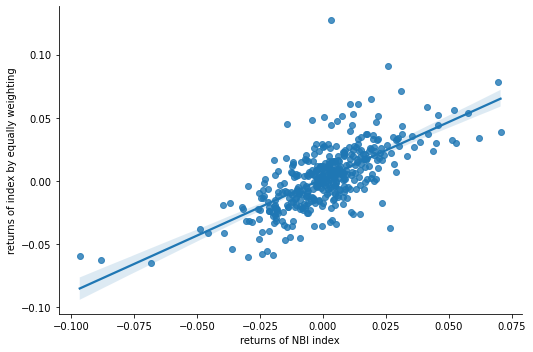

In [54]:
sns.lmplot(x="returns of NBI index", y="returns of index by equally weighting", data=joined_returns_covid, aspect=1.5, fit_reg=True)

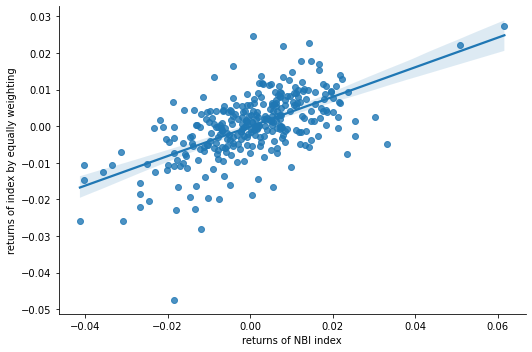

In [55]:
# before covid
sns.lmplot(x="returns of NBI index", y="returns of index by equally weighting", data=joined_returns_beforecovid, aspect=1.5, fit_reg=True)

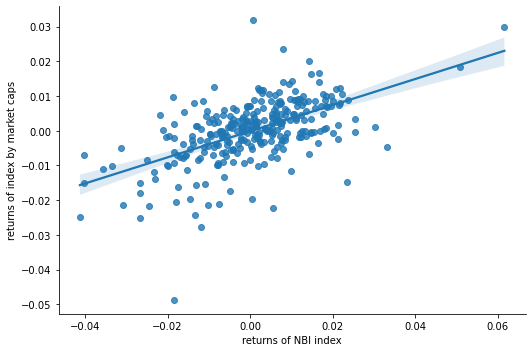

In [56]:

sns.lmplot(x="returns of NBI index", y="returns of index by market caps", data=joined_returns_beforecovid, aspect=1.5, fit_reg=True)

In [57]:
# forecasting
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.
Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number o

In [58]:
# future three year's forecasting on the new index based on the index data since 2018 - euqally weighting
MC_threeyear = MCSimulation(
    portfolio_data = df_portfolio_all,
    weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
    num_simulation = 500,
    num_trading_days = 252*3
)
# Printing the simulation input data
MC_threeyear.portfolio_data.head()

AZN                                              \
                            open   high     low  close   volume daily_return   
time                                                                           
2018-12-10 00:00:00-05:00  38.86  38.86  38.130  38.42  6655389          NaN   
2018-12-11 00:00:00-05:00  39.14  39.31  38.445  38.66  6024419     0.006247   
2018-12-12 00:00:00-05:00  38.91  39.31  38.890  38.92  3967506     0.006725   
2018-12-13 00:00:00-05:00  39.26  39.50  39.030  39.23  1989476     0.007965   
2018-12-14 00:00:00-05:00  39.20  39.21  38.910  39.16  4203526    -0.001784   

                             GSK                         ...     PFE          \
                            open    high    low   close  ...     low   close   
time                                                     ...                   
2018-12-10 00:00:00-05:00  37.41  37.800  37.16  37.685  ...  43.070  44.405   
2018-12-11 00:00:00-05:00  38.06  38.110  37.24  37.360  ...  43.570  44.020   
2018-12-12 00:00:00-05:00  37.76  38.160  37.66  37.670  ...  44.150  44.170   
2018-12-13 00:00:00-05:00  38.03  38.100  37.67  37.940  ...  44.210  44.550   
2018-12-14 00:00:00-05:00  37.58  37.675  37.40  37.615  ...  43.425  43.845   

                                                    SNY                  \
                             volume daily_return   open   high      low   
time                                                                      
2018-12-10 00:00:00-05:00  22466277          NaN  44.15  44.38  43.5100   
2018-12-11 00:00:00-05:00  20020936    -0.008670  44.71  44.72  44.1036   
2018-12-12 00:00:00-05:00  14819586     0.003408  45.28  45.56  45.1400   
2018-12-13 00:00:00-05:00  16251482     0.008603  44.51  44.89  44.3371   
2018-12-14 00:00:00-05:00  24085732    -0.015825  44.03  44.27  44.0000   

                                                        
                           close   volume daily_return  
time                                                    
2018-12-10 00:00:00-05:00  44.17  1172644          NaN  
2018-12-11 00:00:00-05:00  44.34  1295092     0.003849  
2018-12-12 00:00:00-05:00  45.14  1330747     0.018042  
2018-12-13 00:00:00-05:00  44.84  1164531    -0.006646  
2018-12-14 00:00:00-05:00  44.07   992662    -0.017172  

[5 rows x 60 columns]

In [59]:
MC_threeyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\yauhe\GitHub\project1\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1         2          3         4          5         6    \
0    1.000000   1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   
1    0.925329   0.877875  1.107681   0.982111  1.063277   0.981005  0.946286   
2    0.940492   0.841715  1.075561   1.018828  1.066312   0.780145  1.028583   
3    0.932879   0.797848  1.022472   0.988363  1.065429   0.835913  1.013358   
4    0.930363   0.923861  1.031515   0.979837  1.039753   0.828494  1.207821   
..        ...        ...       ...        ...       ...        ...       ...   
752  1.461140  21.177739  1.188745  49.558776  1.351476  14.809060  8.399142   
753  1.330549  20.078215  1.150851  50.738377  1.306128  14.701804  7.495031   
754  1.203180  18.795522  1.283836  51.823629  1.436014  14.892665  7.178170   
755  1.262673  18.205508  1.162773  53.827498  1.363787  17.044798  7.438055   
756  1.319582  16.618665  1.264509  60.683264  1.333465  18.546598  7.333894   

           7         8         9    ...       490       491         492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000    1.000000   
1     1.101280  0.954087  0.986420  ...  0.911825  0.978305    1.058425   
2     1.098836  0.907482  1.113553  ...  0.822125  0.933062    1.157047   
3     1.031845  0.872597  1.162082  ...  0.849338  0.962821    1.273386   
4     0.862792  0.866939  1.183477  ...  0.950595  1.060096    1.337097   
..         ...       ...       ...  ...       ...       ...         ...   
752  13.131094  0.482676  2.659896  ...  9.464911  0.328375  142.002956   
753  12.892346  0.469969  2.775817  ...  9.080420  0.293937  152.881494   
754  12.191839  0.450923  2.820876  ...  8.619394  0.299583  149.600633   
755  12.742823  0.457489  2.808881  ...  8.811432  0.317859  137.845330   
756  11.077119  0.396195  3.038059  ...  9.166803  0.306683  143.348797   

          493       494       495       496        497        498       499  
0    1.000000  1.000000  1.000000  1.000000   1.000000   1.000000  1.000000  
1    0.917152  0.982242  1.171371  1.094049   1.030898   1.090591  0.889845  
2    0.872425  1.040546  1.238955  1.121077   0.866336   1.101339  0.912770  
3    0.905306  0.933454  1.292939  1.250550   0.864279   1.042907  0.996957  
4    0.905605  0.944068  1.388904  1.238155   0.887385   1.146609  1.103897  
..        ...       ...       ...       ...        ...        ...       ...  
752  4.454755  1.695221  3.990043  3.532139  21.118107  10.185055  2.026194  
753  4.567333  1.754418  4.274074  3.720116  20.547727  10.996946  2.057506  
754  4.557189  1.407544  4.145807  3.425440  21.315990  12.570963  2.125626  
755  4.781740  1.351610  4.288338  3.412421  23.604953  12.039343  2.257017  
756  4.921268  1.335059  4.657140  3.498435  21.667434  11.245139  2.477833  

[757 rows x 500 columns]

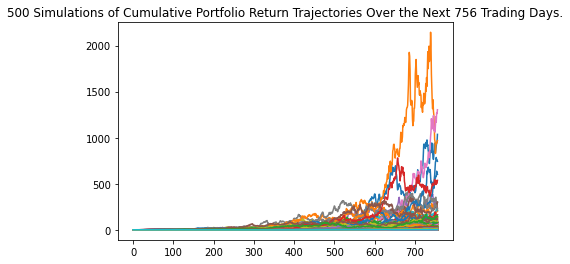

In [60]:
# Plot simulation outcomes
line_plot = MC_threeyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_threeyear_sim_plot.png", bbox_inches="tight")

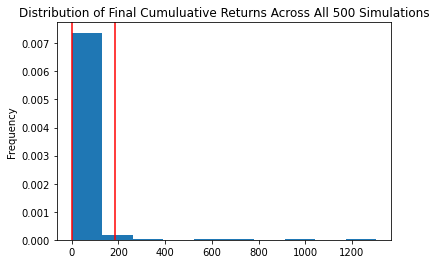

In [61]:
 # Plot probability distribution and confidence intervals
dist_plot = MC_threeyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_threeyear_dist_plot.png',bbox_inches='tight')

In [62]:
tbl = MC_threeyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean              27.283976
std              103.757636
min                0.009787
25%                1.196746
50%                4.412684
75%               15.032216
max             1303.726544
95% CI Lower       0.122964
95% CI Upper     183.731373
Name: 756, dtype: float64


In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $1229.64 and $1837313.73


In [64]:
# future three year's forecasting on the new index based on the index data since 2018 - weight in market caps
MC_threeyear_by_mktcaps = MCSimulation(
    portfolio_data = df_portfolio_all,
    weights = [0.15,0.15,0.007250,0.15,0.006049,0.15,0.007422,0.079279,0.15,0.15],
    num_simulation = 500,
    num_trading_days = 252*3
)
# Printing the simulation input data
MC_threeyear_by_mktcaps.portfolio_data.head()

AZN                                              \
                            open   high     low  close   volume daily_return   
time                                                                           
2018-12-10 00:00:00-05:00  38.86  38.86  38.130  38.42  6655389          NaN   
2018-12-11 00:00:00-05:00  39.14  39.31  38.445  38.66  6024419     0.006247   
2018-12-12 00:00:00-05:00  38.91  39.31  38.890  38.92  3967506     0.006725   
2018-12-13 00:00:00-05:00  39.26  39.50  39.030  39.23  1989476     0.007965   
2018-12-14 00:00:00-05:00  39.20  39.21  38.910  39.16  4203526    -0.001784   

                             GSK                         ...     PFE          \
                            open    high    low   close  ...     low   close   
time                                                     ...                   
2018-12-10 00:00:00-05:00  37.41  37.800  37.16  37.685  ...  43.070  44.405   
2018-12-11 00:00:00-05:00  38.06  38.110  37.24  37.360  ...  43.570  44.020   
2018-12-12 00:00:00-05:00  37.76  38.160  37.66  37.670  ...  44.150  44.170   
2018-12-13 00:00:00-05:00  38.03  38.100  37.67  37.940  ...  44.210  44.550   
2018-12-14 00:00:00-05:00  37.58  37.675  37.40  37.615  ...  43.425  43.845   

                                                    SNY                  \
                             volume daily_return   open   high      low   
time                                                                      
2018-12-10 00:00:00-05:00  22466277          NaN  44.15  44.38  43.5100   
2018-12-11 00:00:00-05:00  20020936    -0.008670  44.71  44.72  44.1036   
2018-12-12 00:00:00-05:00  14819586     0.003408  45.28  45.56  45.1400   
2018-12-13 00:00:00-05:00  16251482     0.008603  44.51  44.89  44.3371   
2018-12-14 00:00:00-05:00  24085732    -0.015825  44.03  44.27  44.0000   

                                                        
                           close   volume daily_return  
time                                                    
2018-12-10 00:00:00-05:00  44.17  1172644          NaN  
2018-12-11 00:00:00-05:00  44.34  1295092     0.003849  
2018-12-12 00:00:00-05:00  45.14  1330747     0.018042  
2018-12-13 00:00:00-05:00  44.84  1164531    -0.006646  
2018-12-14 00:00:00-05:00  44.07   992662    -0.017172  

[5 rows x 60 columns]

In [65]:
MC_threeyear_by_mktcaps.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\yauhe\GitHub\project1\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1         2          3          4         5         6    \
0     1.000000   1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   
1     0.972858   0.945457  1.062499   0.988961   1.048338  0.972059  1.016581   
2     0.989889   0.992120  1.064971   0.963236   0.980366  1.000559  1.000746   
3     1.023248   1.041234  1.104458   0.894140   0.891460  1.019846  1.032694   
4     1.064175   1.044840  1.072336   0.991742   0.791764  1.055675  1.028599   
..         ...        ...       ...        ...        ...       ...       ...   
752  18.420700  85.638261  1.223789  15.577188  11.751858  3.786181  2.772617   
753  18.733345  89.237506  1.216067  16.816929  12.201447  3.762839  3.062659   
754  18.061377  85.691057  1.259770  16.067384  12.489456  4.065320  3.042751   
755  18.244512  85.125564  1.292343  17.529544  13.139321  4.097218  2.878462   
756  18.479718  88.155694  1.251508  16.044244  13.033204  3.772343  2.586066   

          7         8         9    ...       490       491        492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000   1.000000   
1    1.004310  1.086800  1.012593  ...  1.001776  1.000555   1.029430   
2    1.039557  1.052020  0.925557  ...  0.964214  0.939665   1.072114   
3    0.995731  1.025859  0.927057  ...  0.871182  0.850053   1.025899   
4    1.028293  1.087605  0.974383  ...  0.808502  0.838689   1.038066   
..        ...       ...       ...  ...       ...       ...        ...   
752  0.522196  2.010447  2.091956  ...  6.592443  5.592136  82.667316   
753  0.538624  2.057605  2.209846  ...  6.646463  5.771725  81.647073   
754  0.535708  2.100005  2.226550  ...  6.596992  5.835261  84.154708   
755  0.527619  2.007463  2.349503  ...  6.399532  5.606980  87.233031   
756  0.511411  2.009405  2.427020  ...  6.551588  5.812532  93.186616   

           493       494       495        496       497       498       499  
0     1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  
1     0.989660  0.925414  0.964506   1.123261  1.013290  0.938814  1.018272  
2     0.934697  0.852563  0.893175   1.157696  1.019632  0.975431  0.938989  
3     0.988759  0.886033  0.882781   1.120985  1.062365  0.964673  0.903774  
4     1.020861  0.850914  0.932014   1.048914  1.022599  0.886837  0.904340  
..         ...       ...       ...        ...       ...       ...       ...  
752  34.656085  5.805365  7.236485  22.334788  3.835878  1.680302  1.581079  
753  35.877390  5.909337  7.816925  20.294163  3.702649  1.702800  1.537010  
754  33.437503  6.246235  7.343966  20.879743  3.319252  1.698061  1.495301  
755  33.171150  6.230834  8.038729  20.405577  3.367961  1.591421  1.485774  
756  32.838792  5.975481  8.395259  22.454309  3.358469  1.560714  1.393428  

[757 rows x 500 columns]

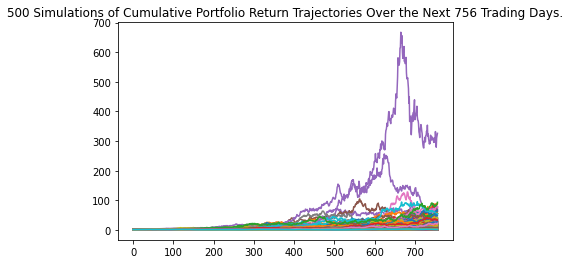

In [66]:
# Plot simulation outcomes
line_plot_by_mktcaps = MC_threeyear_by_mktcaps.plot_simulation()

# Save the plot for future usage
line_plot_by_mktcaps.get_figure().savefig("MC_threeyear_sim_plot_by_mktcaps.png", bbox_inches="tight")

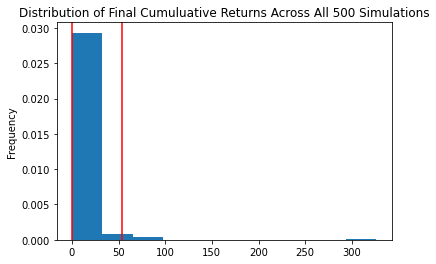

In [67]:
 # Plot probability distribution and confidence intervals
dist_plot_by_mktcaps = MC_threeyear_by_mktcaps.plot_distribution()

# Save the plot for future usage
dist_plot_by_mktcaps.get_figure().savefig('MC_threeyear_dist_plot_by_mktcap.png',bbox_inches='tight')

In [68]:
tbl_by_mktcaps = MC_threeyear_by_mktcaps.summarize_cumulative_return()

# Print summary statistics
print(tbl_by_mktcaps)

count           500.000000
mean              8.084372
std              19.097572
min               0.026159
25%               1.130707
50%               2.810013
75%               7.840661
max             326.174148
95% CI Lower      0.208552
95% CI Upper     53.872941
Name: 756, dtype: float64


In [69]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_by_mktcaps[8]*10000,2)
ci_upper = round(tbl_by_mktcaps[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $2085.52 and $538729.41
